In [1]:
# Cell 1: Imports and Versions
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("keras module:", keras)

print("\nFunction explanations:")
print("- keras.datasets.mnist.load_data(): Loads the MNIST handwritten digits dataset, returning train and test splits.")
print("- astype(): Converts array to a specified type (e.g., float32).")
print("- reshape(): Changes the shape of an array without altering its data.")
print("- keras.Sequential: A container to stack layers into a model.")
print("- Dense: A fully connected neural network layer.")
print("- compile(): Configures the model for training (optimizer, loss, metrics).")
print("- fit(): Trains the model for a specified number of epochs.")
print("- evaluate(): Computes loss and metrics on test data.\n")

TensorFlow version: 2.19.0
keras module: <KerasLazyLoader>

Function explanations:
- keras.datasets.mnist.load_data(): Loads the MNIST handwritten digits dataset, returning train and test splits.
- astype(): Converts array to a specified type (e.g., float32).
- reshape(): Changes the shape of an array without altering its data.
- keras.Sequential: A container to stack layers into a model.
- Dense: A fully connected neural network layer.
- compile(): Configures the model for training (optimizer, loss, metrics).
- fit(): Trains the model for a specified number of epochs.
- evaluate(): Computes loss and metrics on test data.



In [10]:
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Detailed printing of dataset structure and meanings
print("📦 MNIST Dataset Loaded Successfully\n")

print("🔹 x_train:")
print(f"  Shape: {x_train.shape}")
print("  → Training images: 60,000 grayscale images of 28x28 pixels each.")

print("\n🔹 y_train:")
print(f"  Shape: {y_train.shape}")
print("  → Training labels: One label per training image (digits 0–9).")

print("\n🔹 x_test:")
print(f"  Shape: {x_test.shape}")
print("  → Test images: 10,000 grayscale images of 28x28 pixels each.")

print("\n🔹 y_test:")
print(f"  Shape: {y_test.shape}")
print("  → Test labels: One label per test image (digits 0–9).")

print("\n✅ Summary:")
print("  - x_train: Training images")
print("  - y_train: Labels for training images")
print("  - x_test : Test images (for evaluation)")
print("  - y_test : Labels for test images")

📦 MNIST Dataset Loaded Successfully

🔹 x_train:
  Shape: (60000, 28, 28)
  → Training images: 60,000 grayscale images of 28x28 pixels each.

🔹 y_train:
  Shape: (60000,)
  → Training labels: One label per training image (digits 0–9).

🔹 x_test:
  Shape: (10000, 28, 28)
  → Test images: 10,000 grayscale images of 28x28 pixels each.

🔹 y_test:
  Shape: (10000,)
  → Test labels: One label per test image (digits 0–9).

✅ Summary:
  - x_train: Training images
  - y_train: Labels for training images
  - x_test : Test images (for evaluation)
  - y_test : Labels for test images


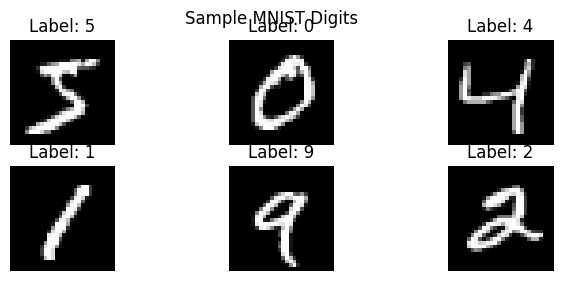

In [11]:
# Display first 6 training images
plt.figure(figsize=(8, 3))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

In [12]:
# Cell 3: Preprocessing
# Scale pixel values from [0,255] -> [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
# Flatten images to vectors of length 784
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

print("After preprocessing:")
print("x_train shape:", x_train.shape)
print("x_test  shape:", x_test.shape)

After preprocessing:
x_train shape: (60000, 784)
x_test  shape: (10000, 784)


In [18]:
# Cell 4: Build the Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),                       # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')                     # Output layer
])
print("\nModel architecture summary:")
model.summary()


Model architecture summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Cell 5: Compile the Model
model.compile(
    optimizer='adam',                           # Adam optimizer
    loss='sparse_categorical_crossentropy',     # Loss for integer labels
    metrics=['accuracy']                        # Track accuracy
)
print("\nModel compiled with optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'].")


Model compiled with optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'].


In [24]:
# Cell 6: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.9988 - loss: 0.0033 - val_accuracy: 0.9813 - val_loss: 0.1617
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9797 - val_loss: 0.1692
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.9977 - loss: 0.0079 - val_accuracy: 0.9778 - val_loss: 0.1592
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9974 - loss: 0.0099 - val_accuracy: 0.9820 - val_loss: 0.1406
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.9800 - val_loss: 0.1637


In [16]:
# Cell 7: Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9734 - loss: 0.0956

Test Loss: 0.0865
Test Accuracy: 0.9759


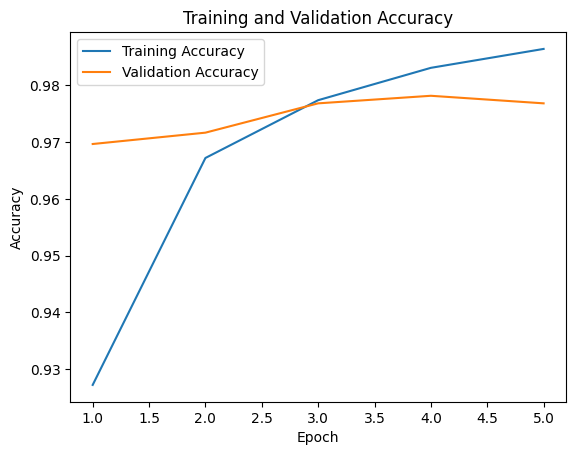

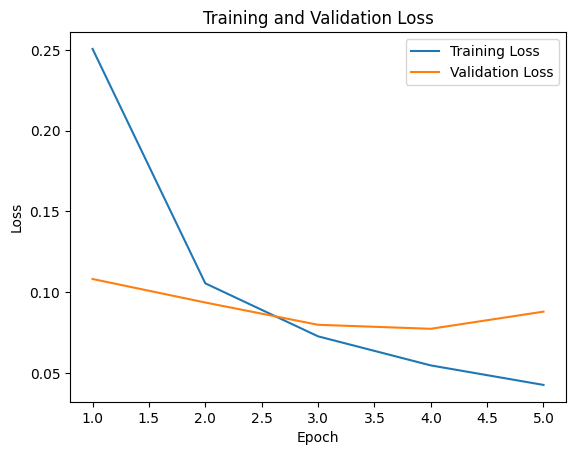

In [17]:
# Cell 8: Plot Training History Metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()